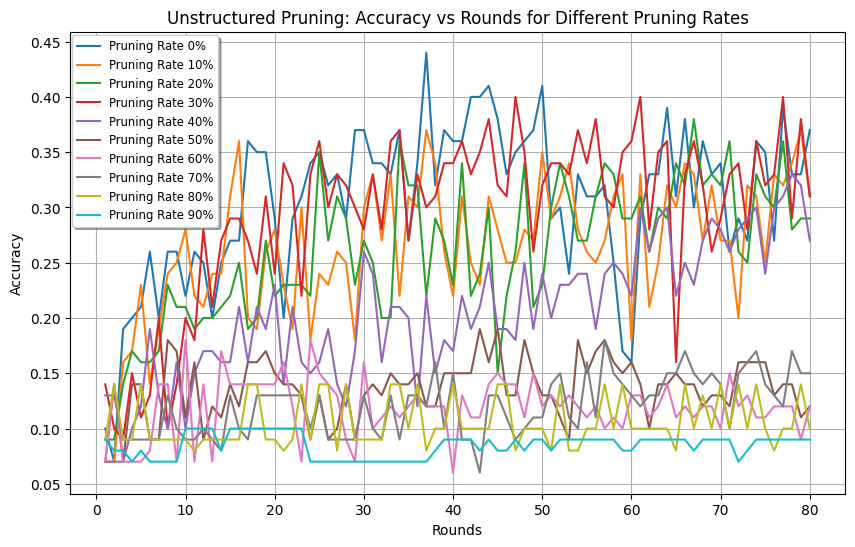

In [18]:
import json
import matplotlib.pyplot as plt

# Load the data from the JSON file
with open('Experimental data/CIFAR10_ResNet12_Structured.json') as f:
    data = json.load(f)

# Sort the data by pruning rate in ascending order
data_sorted = sorted(data, key=lambda x: x["pruning_rate"])

# Prepare the plot
plt.figure(figsize=(10, 6))

# Iterate through each entry in the sorted data
for entry in data_sorted:
    pruning_rate = entry["pruning_rate"]
    rounded_pruning_rate = round(pruning_rate * 100)
    rounds_accuracy = entry["history_metrics_distributed_evaluate"]["accuracy"]
    rounds = [item[0] for item in rounds_accuracy]
    accuracy = [item[1] for item in rounds_accuracy]

    # Plot each pruning rate
    plt.plot(rounds, accuracy, label=f'Pruning Rate {rounded_pruning_rate}%')

# Customize the plot
plt.xlabel('Rounds')
plt.ylabel('Accuracy')
plt.title('Unstructured Pruning: Accuracy vs Rounds for Different Pruning Rates')
plt.legend(loc='upper left', bbox_to_anchor=(-0.005, 1.005), frameon=True, fontsize='small', fancybox=True, shadow=True, ncol=1)
plt.grid(True)
plt.show()


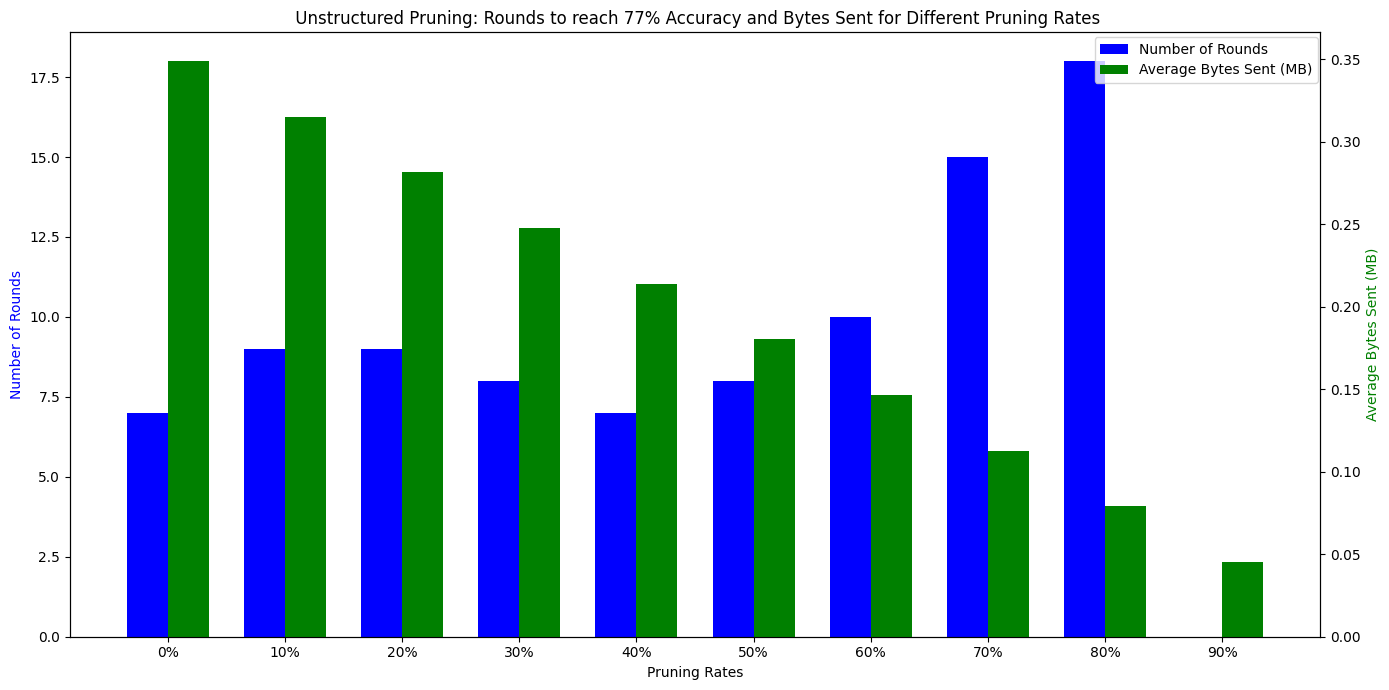

In [10]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the JSON file
with open('Experimental data/MNIST_SimpleCNN_Unstructured.json') as f:
    data = json.load(f)

# Prepare lists to store the metrics
pruning_rates = []
rounds_to_threshold = []
average_bytes_sent = []
threshold = 0.77
data_sorted = sorted(data, key=lambda x: x["pruning_rate"])

# Iterate through each entry in the data to calculate the required values
for entry in data_sorted:
    pruning_rate = entry["pruning_rate"]
    rounded_pruning_rate = round(pruning_rate * 100)

    # Find the round where accuracy first hits the threshold
    accuracy = entry["history_metrics_centralized"]["accuracy"]
    round_at_threshold = next((item[0] for item in accuracy if item[1] >= threshold), float('inf'))

    # Calculate total bytes sent in megabytes
    bytes_sent = [item[1] for item in entry["history_metrics_distributed_fit"]["bytes sent"]]
    total_bytes_sent_mb = (sum(bytes_sent) / len(bytes_sent)) / 1_048_576 if bytes_sent else 0

    # Store the calculated values
    pruning_rates.append(f'{rounded_pruning_rate}%')
    rounds_to_threshold.append(round_at_threshold)
    average_bytes_sent.append(total_bytes_sent_mb)

# Set up the bar chart
x = np.arange(len(pruning_rates))
width = 0.35

fig, ax1 = plt.subplots(figsize=(14, 7))  # Increased size for better layout

# Bar chart for rounds to threshold
bar1 = ax1.bar(x - width/2, rounds_to_threshold, width, label='Number of Rounds', color='b')

# Bar chart for average bytes sent
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, average_bytes_sent, width, label='Average Bytes Sent (MB)', color='g')

# Add labels, title, and legend
ax1.set_xlabel('Pruning Rates')
ax1.set_ylabel('Number of Rounds', color='b')
ax2.set_ylabel('Average Bytes Sent (MB)', color='g')
ax1.set_title(' Unstructured Pruning: Rounds to reach 77% Accuracy and Bytes Sent for Different Pruning Rates')
ax1.set_xticks(x)
ax1.set_xticklabels(pruning_rates)

# Add legends outside the chart
fig.legend(loc='upper right', bbox_to_anchor=(0.95, 0.95))

# Adjust layout to make room for the legend
fig.tight_layout()

# Show plot
plt.show()
